In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sorted_temp_and_rain_dataset.csv')

In [3]:
df.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [4]:
df

,tem,Month,Year,rain
0,16.976000,1,1901,18.535600
1,19.902600,2,1901,16.254800
2,24.315800,3,1901,70.798100
3,28.183400,4,1901,66.161600
4,27.889200,5,1901,267.215000
...,...,...,...,...
1469,28.586394,6,2023,299.915166
1470,28.533089,7,2023,353.399033
1471,28.451926,8,2023,421.058714
1472,27.737212,9,2023,306.090925


In [5]:
df.tail()

,tem,Month,Year,rain
1469,28.586394,6,2023,299.915166
1470,28.533089,7,2023,353.399033
1471,28.451926,8,2023,421.058714
1472,27.737212,9,2023,306.090925
1473,26.015523,10,2023,320.779073


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1474 non-null   float64
 1   Month   1474 non-null   int64  
 2   Year    1474 non-null   int64  
 3   rain    1474 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 46.2 KB


In [7]:
df.columns

Index(['tem', 'Month', 'Year', 'rain'], dtype='object')

In [8]:
df['rain'].value_counts()

rain
4.250470      2
18.535600     1
39.417200     1
396.943000    1
377.107000    1
             ..
69.074700     1
264.913000    1
222.544000    1
578.413000    1
320.779073    1
Name: count, Length: 1473, dtype: int64

In [9]:
df.isnull().sum()

tem      0
Month    0
Year     0
rain     0
dtype: int64

In [10]:
#features & target
df.dtypes

tem      float64
Month      int64
Year       int64
rain     float64
dtype: object

In [ ]:
# Convert 'rain' column to binary labels (1 for rain, 0 for no rain)
df['rain_binary'] = df['rain'].apply(lambda x: 1 if x > 0 else 0)

# Assuming 'rain_binary' is the binary target variable and other columns are features
X = df.drop(columns=['rain', 'rain_binary'])  # Features
y = df['rain_binary']  # Binary target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd

# Assuming y_train contains continuous values
num_bins = 5  # You can adjust the number of bins as needed
bins = pd.cut(y_train, num_bins, labels=False)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 1: Define thresholds for rainfall categories
low_threshold = 0
medium_threshold = 100
high_threshold = 300

# Step 2: Convert continuous values into categorical labels
def categorize_rainfall(amount):
    if amount <= low_threshold:
        return 'Low'
    elif amount <= medium_threshold:
        return 'Medium'
    else:
        return 'High'

# Load rain data from CSV
#df = pd.read_csv('rain_data.csv')

# Apply categorization function to create new column 'Rain Category'
df['Rain Category'] = df['rain'].apply(categorize_rainfall)

# Step 3: Split the dataset into training and testing sets
X = df[['rain']]
y = df['Rain Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Step 5: Test the model's performance
y_pred = naive_bayes_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate error rate
error_nb = 1 - accuracy
print(" naive bayes error rate:", error_nb)

Accuracy: 0.981941309255079
 naive bayes error rate: 0.018058690744920947


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Step 4: Train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Step 5: Test the model's performance
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Calculate error rate
error_nb = 1 - accuracy
print(" Random Forest error rate:", error_nb)

Random Forest Accuracy: 0.9977426636568849
 Random Forest error rate: 0.0022573363431150906


In [16]:
from sklearn.svm import SVC

# Step 4: Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 5: Test the model's performance
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

# Calculate error rate
error_nb = 1 - accuracy
print(" SVM error rate:", error_nb)

SVM Accuracy: 0.9977426636568849
 SVM error rate: 0.0022573363431150906


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Step 4: Train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Step 5: Test the model's performance
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

# Calculate error rate
error_nb = 1 - accuracy
print(" KNN error rate:", error_nb)


KNN Accuracy: 0.9954853273137697
 KNN error rate: 0.004514672686230292


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Step 4: Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Step 5: Test the model's performance
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

# Calculate error rate
error_nb = 1 - accuracy
print(" Decision Tree error rate:", error_nb)

Decision Tree Accuracy: 0.9977426636568849
 Decision Tree error rate: 0.0022573363431150906


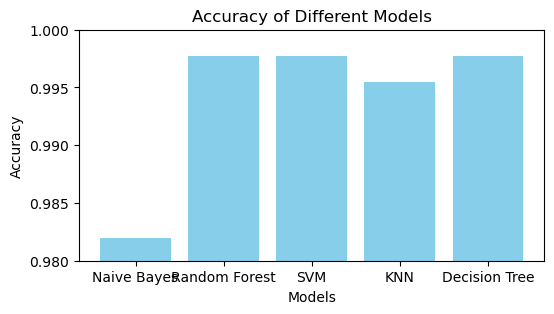

In [19]:
import matplotlib.pyplot as plt

# Precision values
precision_values = [0.981941309255079,0.9977426636568849,0.9977426636568849, 0.9954853273137697,0.9977426636568849]
models = ['Naive Bayes', 'Random Forest', 'SVM', 'KNN', 'Decision Tree']

# Plot
plt.figure(figsize=(6, 3))
plt.bar(models, precision_values, color='skyblue')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.98, 1.0)  # Set y-axis limit to focus on precision differences
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

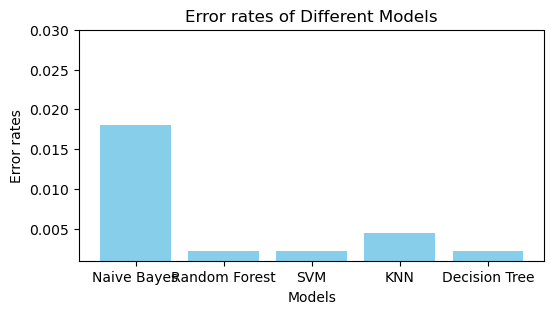

In [20]:
import matplotlib.pyplot as plt

# Precision values
precision_values = [0.018058690744920947,0.0022573363431150906,0.0022573363431150906,0.004514672686230292,0.0022573363431150906]
models = ['Naive Bayes', 'Random Forest', 'SVM', 'KNN', 'Decision Tree']

# Plot
plt.figure(figsize=(6,3))
plt.bar(models, precision_values, color='skyblue')
plt.title('Error rates of Different Models')
plt.xlabel('Models')
plt.ylabel('Error rates')
plt.ylim(0.001, 0.03)  # Set y-axis limit to focus on precision differences
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score  # Importing precision_score

# Step 1: Define thresholds for rainfall categories
low_threshold = 0
medium_threshold = 100
high_threshold = 300

# Step 2: Convert continuous values into categorical labels
def categorize_rainfall(amount):
    if amount <= low_threshold:
        return 'Low'
    elif amount <= medium_threshold:
        return 'Medium'
    else:
        return 'High'

# Load rain data from CSV
# df = pd.read_csv('rain_data.csv')

# Apply categorization function to create new column 'Rain Category'
df['Rain Category'] = df['rain'].apply(categorize_rainfall)

# Step 3: Split the dataset into training and testing sets
X = df[['rain']]
y = df['Rain Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store precision scores of each model
precisions = {}

# Step 4: Train and test different models
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    precisions[name] = precision

# Print precision values
for name, precision in precisions.items():
    print(f'Precision of {name}: {precision}')


Precision of Naive Bayes: 0.9822906826876624
Precision of Random Forest: 0.9977546072354199
Precision of SVM: 0.9977546072354199
Precision of KNN: 0.9954941796131546
Precision of Decision Tree: 0.9977546072354199


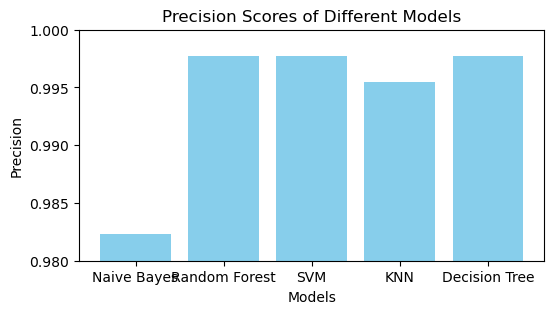

In [23]:
import matplotlib.pyplot as plt

# Precision values
precision_values = [0.9822906826876624, 0.9977546072354199, 0.9977546072354199, 0.9954941796131546, 0.9977546072354199]
models = ['Naive Bayes', 'Random Forest', 'SVM', 'KNN', 'Decision Tree']

# Plot
plt.figure(figsize=(6, 3))
plt.bar(models, precision_values, color='skyblue')
plt.title('Precision Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.98, 1.0)  # Set y-axis limit to focus on precision differences
#plt.grid(axis='both', linestyle='--', color='gray', alpha=0.7)
plt.show()


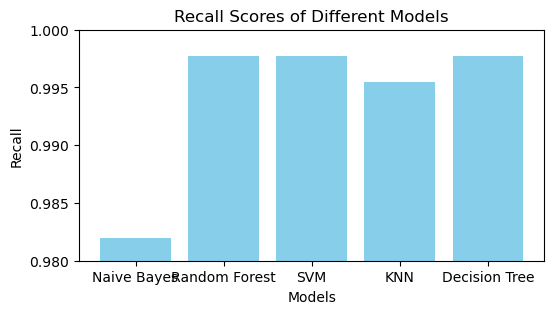

In [26]:
import matplotlib.pyplot as plt

# Precision values
precision_values = [0.981941309255079,0.9977426636568849,0.9977426636568849,0.9954853273137697,0.9977426636568849]
models = ['Naive Bayes', 'Random Forest', 'SVM', 'KNN', 'Decision Tree']

# Plot
plt.figure(figsize=(6, 3))
plt.bar(models, precision_values, color='skyblue')
plt.title('Recall Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.98, 1.0)  # Set y-axis limit to focus on precision differences
#plt.grid(axis='both', linestyle='--', color='gray', alpha=0.7)
plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score  # Importing f1_score

# Step 1: Define thresholds for rainfall categories
low_threshold = 0
medium_threshold = 100
high_threshold = 300

# Step 2: Convert continuous values into categorical labels
def categorize_rainfall(amount):
    if amount <= low_threshold:
        return 'Low'
    elif amount <= medium_threshold:
        return 'Medium'
    else:
        return 'High'

# Load rain data from CSV
# df = pd.read_csv('rain_data.csv')

# Apply categorization function to create new column 'Rain Category'
df['Rain Category'] = df['rain'].apply(categorize_rainfall)

# Step 3: Split the dataset into training and testing sets
X = df[['rain']]
y = df['Rain Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store F1 scores of each model
f1_scores = {}

# Step 4: Train and test different models
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1

# Print F1 scores
for name, f1 in f1_scores.items():
    print(f'F1 score of {name}: {f1}')


F1 score of Naive Bayes: 0.9807736071121199
F1 score of Random Forest: 0.996616989300106
F1 score of SVM: 0.996616989300106
F1 score of KNN: 0.994358876564946
F1 score of Decision Tree: 0.996616989300106


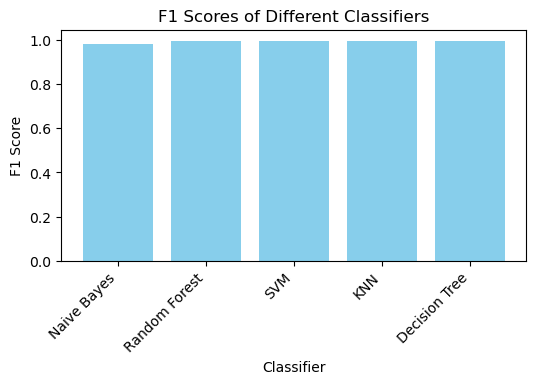

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Step 1: Define thresholds for rainfall categories
low_threshold = 0
medium_threshold = 100
high_threshold = 300

# Step 2: Convert continuous values into categorical labels
def categorize_rainfall(amount):
    if amount <= low_threshold:
        return 'Low'
    elif amount <= medium_threshold:
        return 'Medium'
    else:
        return 'High'

# Load rain data from CSV
# df = pd.read_csv('rain_data.csv')

# Apply categorization function to create new column 'Rain Category'
df['Rain Category'] = df['rain'].apply(categorize_rainfall)

# Step 3: Split the dataset into training and testing sets
X = df[['rain']]
y = df['Rain Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store F1 scores of each model
f1_scores = {}

# Step 4: Train and test different models
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1

# Plotting F1 scores
plt.figure(figsize=(6, 3))  # Set figure size to (6, 3)
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.show()
